# Parse RIS files into a data table

This notebook is a proof of concept to create a functionality to parse RIS files into a data table useful for ASReview

In [55]:
import pandas as pd
import rispy
import os

In [51]:
filepath = 'test/bib_zotero.ris'

In [56]:
with open(filepath, 'r') as bibliography_file:
    entries = rispy.load(bibliography_file)
    for entry in entries:
        print(entry['title'])
        

Associations Between Eight Earth Observation‐Derived Climate Variables and Enteropathogen Infection: An Independent Participant Data Meta‐Analysis of Surveillance Studies With Broad Spectrum Nucleic Acid Diagnostics
Use of earth observation-derived hydrometeorological variables to model and predict rotavirus infection (MAL-ED): a multisite cohort study
Seasonality and the effects of weather on Campylobacter infections
The seasonality of diarrheal pathogens: A retrospective study of seven sites over three years
The effects of ambient temperature and heatwaves on daily <i>Campylobacter</i> cases in Adelaide, Australia, 1990–2012
Climate variability and campylobacter infection: an international study
Potential impact of macroclimatic variability on the epidemiology of giardiasis in three provinces of Cuba, 2010–2012
The Influence of Climate and Livestock Reservoirs on Human Cases of Giardiasis
Temperature-dependent transmission of rotavirus in Great Britain and The Netherlands
Determinant

In [1]:
from asreview import open_state
from asreview import ASReviewProject
from asreview import ASReviewData

In [3]:
import shutil
from pathlib import Path

import pandas as pd

In [4]:
project_path = Path("tmp_data")
project_path.mkdir()
project = ASReviewProject.load("Example 2.asreview", project_path)


In [5]:
project.config

{'version': '1.6.1',
 'id': '89e31f2ece374a22805b146b5cf7239e',
 'mode': 'oracle',
 'name': 'Example 2',
 'description': '',
 'authors': 'Eva',
 'created_at_unix': 1716280472,
 'datetimeCreated': '2024-05-21 10:34:32.423233',
 'reviews': [{'id': '4dd88cbd5cd5464bb54d6bbe45a2628a',
   'start_time': '2024-05-21 10:45:00.835633',
   'status': 'review'}],
 'feature_matrices': [{'id': 'tfidf', 'filename': 'tfidf_feature_matrix.npz'}],
 'dataset_path': 'mine-dd.ris'}

In [6]:
dataset_fp = Path(
    project_path, project.config["id"], "data", project.config["dataset_path"]
)
dataset = ASReviewData.from_file(dataset_fp)
print(f"The dataset contains {len(dataset)} records.")
dataset.to_dataframe().head()

The dataset contains 28 records.


,type_of_reference,title,authors,secondary_title,abstract,date,year,doi,database_provider,volume,...,start_page,alternate_title1,language,issn,short_title,url,access_date,file_attachments1,end_page,secondary_authors
record_id,,,,,,,,,,,,,,,,,,,,,
0,JOUR,Associations Between Eight Earth Observation‐D...,"['Colston, Josh M.', 'Zaitchik, Benjamin F.', ...",GeoHealth,"Abstract Diarrheal disease, still a major caus...",2022/01//,2022,10.1029/2021GH000452,DOI.org (Crossref),6,...,e2021GH000452,GeoHealth,en,"2471-1403, 2471-1403",Associations Between Eight Earth Observation‐D...,https://agupubs.onlinelibrary.wiley.com/doi/10...,2024/04/26/11:36:50,https://onlinelibrary.wiley.com/doi/pdfdirect/...,NaN,NaN
1,JOUR,Use of earth observation-derived hydrometeorol...,"['Colston, Josh M', 'Zaitchik, Benjamin', 'Kan...",The Lancet Planetary Health,,2019/06//,2019,10.1016/S2542-5196(19)30084-1,DOI.org (Crossref),3,...,e248,The Lancet Planetary Health,en,25425196,Use of earth observation-derived hydrometeorol...,https://linkinghub.elsevier.com/retrieve/pii/S...,2024/04/26/11:37:05,https://www.thelancet.com/article/S25425196193...,e258,NaN
2,JOUR,Seasonality and the effects of weather on Camp...,"['Djennad, Abdelmajid', 'Lo Iacono, Giovanni',...",BMC Infectious Diseases,,2019/12//,2019,10.1186/s12879-019-3840-7,DOI.org (Crossref),19,...,255,BMC Infect Dis,en,1471-2334,NaN,https://bmcinfectdis.biomedcentral.com/article...,2024/04/26/12:01:26,https://bmcinfectdis.biomedcentral.com/track/p...,NaN,NaN
3,JOUR,The seasonality of diarrheal pathogens: A retr...,"['Chao, Dennis L.', 'Roose, Anna', 'Roh, Min',...",PLOS Neglected Tropical Diseases,,2019/08/15/,2019,10.1371/journal.pntd.0007211,DOI.org (Crossref),13,...,e0007211,PLoS Negl Trop Dis,en,1935-2735,The seasonality of diarrheal pathogens,https://dx.plos.org/10.1371/journal.pntd.0007211,2024/04/26/12:02:06,https://journals.plos.org/plosntds/article/fil...,NaN,"[Kang, Gagandeep]"
4,JOUR,The effects of ambient temperature and heatwav...,"['Milazzo, A.', 'Giles, L. C.', 'Zhang, Y.', '...",Epidemiology and Infection,SUMMARY Campylobacter spp. is a commonly repor...,2017/09//,2017,10.1017/S095026881700139X,DOI.org (Crossref),145,...,2603,Epidemiol. Infect.,en,"0950-2688, 1469-4409",NaN,https://www.cambridge.org/core/product/identif...,2024/04/26/12:02:23,https://www.cambridge.org/core/services/aop-ca...,2610,NaN


In [7]:
feature_extraction_id = project.feature_matrices[0]["id"]
feature_matrix = project.get_feature_matrix(feature_extraction_id)
print(feature_matrix[0])

  (0, 934)	0.045141559739575565
  (0, 933)	0.045141559739575565
  (0, 932)	0.04015990843844081
  (0, 928)	0.1618927109849683
  (0, 925)	0.045141559739575565
  (0, 923)	0.02666206798844053
  (0, 922)	0.045141559739575565
  (0, 917)	0.045141559739575565
  (0, 916)	0.08031981687688163
  (0, 913)	0.045141559739575565
  (0, 912)	0.14650148236284014
  (0, 911)	0.04015990843844081
  (0, 910)	0.04015990843844081
  (0, 908)	0.045141559739575565
  (0, 906)	0.036625370590710034
  (0, 902)	0.09493115786872586
  (0, 894)	0.045141559739575565
  (0, 891)	0.04015990843844081
  (0, 887)	0.045141559739575565
  (0, 883)	0.04015990843844081
  (0, 870)	0.04015990843844081
  (0, 864)	0.029749783364199898
  (0, 863)	0.0761027426803494
  (0, 847)	0.04015990843844081
  (0, 844)	0.03388377004231533
  :	:
  (0, 105)	0.028109181441844513
  (0, 91)	0.028109181441844513
  (0, 85)	0.09028311947915113
  (0, 82)	0.04015990843844081
  (0, 77)	0.036625370590710034
  (0, 73)	0.045141559739575565
  (0, 67)	0.0451415597395

In [15]:
with open_state("Example 2.asreview") as state:
    df = state.get_dataset()
    print(f"The state contains {len(df)} records.")


The state contains 16 records.


In [16]:
df.to_csv(project_path / "example2_state.csv", index=False)
df.head()

,record_id,label,classifier,query_strategy,balance_strategy,feature_extraction,training_set,labeling_time,notes
0,0,1,None,prior,None,None,-1,2024-05-21 10:45:18.101320,None
1,5,1,None,prior,None,None,-1,2024-05-21 10:45:27.550800,None
2,9,1,None,prior,None,None,-1,2024-05-21 10:45:38.120825,None
3,15,0,None,prior,None,None,-1,2024-05-21 10:45:49.320977,None
4,19,0,None,prior,None,None,-1,2024-05-21 10:45:59.279921,None


In [17]:
df["labeling_order"] = df.index
dataset_with_results = dataset.df.join(df.set_index("record_id"))
dataset_with_results.to_csv(project_path / "data_and_state_merged.csv", index=False)
dataset_with_results


,type_of_reference,title,authors,secondary_title,abstract,date,year,doi,database_provider,volume,...,secondary_authors,label,classifier,query_strategy,balance_strategy,feature_extraction,training_set,labeling_time,notes,labeling_order
record_id,,,,,,,,,,,,,,,,,,,,,
0,JOUR,Associations Between Eight Earth Observation‐D...,"['Colston, Josh M.', 'Zaitchik, Benjamin F.', ...",GeoHealth,"Abstract Diarrheal disease, still a major caus...",2022/01//,2022,10.1029/2021GH000452,DOI.org (Crossref),6,...,NaN,1.0,None,prior,None,None,-1.0,2024-05-21 10:45:18.101320,None,0.0
1,JOUR,Use of earth observation-derived hydrometeorol...,"['Colston, Josh M', 'Zaitchik, Benjamin', 'Kan...",The Lancet Planetary Health,,2019/06//,2019,10.1016/S2542-5196(19)30084-1,DOI.org (Crossref),3,...,NaN,1.0,nb,max,double,tfidf,7.0,2024-05-21 10:49:42.518388,None,8.0
2,JOUR,Seasonality and the effects of weather on Camp...,"['Djennad, Abdelmajid', 'Lo Iacono, Giovanni',...",BMC Infectious Diseases,,2019/12//,2019,10.1186/s12879-019-3840-7,DOI.org (Crossref),19,...,NaN,1.0,nb,max,double,tfidf,6.0,2024-05-21 10:49:28.107726,None,6.0
3,JOUR,The seasonality of diarrheal pathogens: A retr...,"['Chao, Dennis L.', 'Roose, Anna', 'Roh, Min',...",PLOS Neglected Tropical Diseases,,2019/08/15/,2019,10.1371/journal.pntd.0007211,DOI.org (Crossref),13,...,"[Kang, Gagandeep]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JOUR,The effects of ambient temperature and heatwav...,"['Milazzo, A.', 'Giles, L. C.', 'Zhang, Y.', '...",Epidemiology and Infection,SUMMARY Campylobacter spp. is a commonly repor...,2017/09//,2017,10.1017/S095026881700139X,DOI.org (Crossref),145,...,NaN,1.0,nb,max,double,tfidf,9.0,2024-05-21 10:50:07.343980,None,10.0
5,JOUR,Climate variability and campylobacter infectio...,"['Sari Kovats, R.', 'Edwards, Sally J.', 'Char...",International Journal of Biometeorology,Campylobacter is among the most important agen...,2005/03//,2005,10.1007/s00484-004-0241-3,DOI.org (Crossref),49,...,NaN,1.0,None,prior,None,None,-1.0,2024-05-21 10:45:27.550800,None,1.0
6,JOUR,Potential impact of macroclimatic variability ...,"['Escobedo, Angel A.', 'Almirall, Pedro', 'Rum...",Journal of Infection and Public Health,,2015/01//,2015,10.1016/j.jiph.2014.06.001,DOI.org (Crossref),8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,JOUR,The Influence of Climate and Livestock Reservo...,"['Brunn, Ariel', 'Fisman, David N.', 'Sargeant...",EcoHealth,,2019/03//,2019,10.1007/s10393-018-1385-7,DOI.org (Crossref),16,...,NaN,1.0,nb,max,double,tfidf,14.0,2024-05-21 10:50:51.350644,None,15.0
8,JOUR,Temperature-dependent transmission of rotaviru...,"['Atchison, C. J.', 'Tam, C. C.', 'Hajat, S.',...",Proceedings of the Royal Society B: Biological...,"In Europe, rotavirus gastroenteritis peaks in ...",2010/03/22/,2010,10.1098/rspb.2009.1755,DOI.org (Crossref),277,...,NaN,1.0,nb,max,double,tfidf,6.0,2024-05-21 10:49:36.389565,None,7.0


<Axes: title={'center': 'Time of labeling'}>

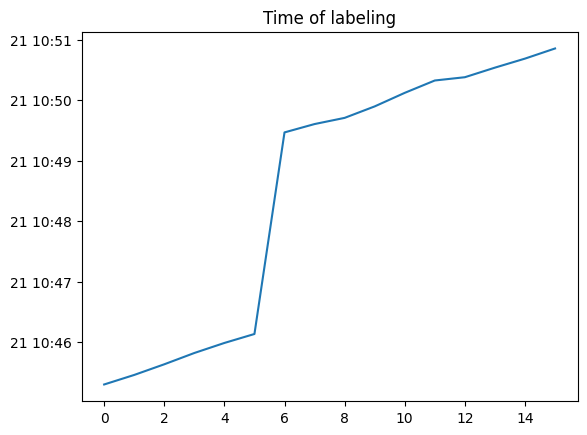

In [21]:
with open_state("Example 2.asreview") as state:
    labeling_times = state.get_labeling_times()
pd.to_datetime(labeling_times).plot(title="Time of labeling")


In [22]:
with open_state("Example 2.asreview") as state:
    labels = state.get_labels(priors=False)
labels

0    1
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: label, dtype: int64

In [23]:
with open_state("Example 2.asreview") as state:
    settings = state.settings_metadata
settings

{'settings': {'model': 'nb',
  'query_strategy': 'max',
  'balance_strategy': 'double',
  'feature_extraction': 'tfidf',
  'n_instances': 1,
  'model_param': {'alpha': 3.822},
  'query_param': {},
  'feature_param': {'ngram_max': 1,
   'stop_words': 'english',
   'split_ta': 0,
   'use_keywords': 0},
  'balance_param': {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}},
 'state_version': '1',
 'software_version': '1.6.1',
 'model_has_trained': True}

In [24]:
with open_state("Example 2.asreview") as state:
    last_ranking = state.get_last_ranking()
    last_probabilities = state.get_last_probabilities()
print("RANKING:")
print(last_ranking[["record_id", "ranking"]])
print("RELEVANCE SCORES:")
print(last_probabilities)

RANKING:
    record_id  ranking
0           5        0
1           8        1
2           2        2
3           0        3
4           9        4
5           4        5
6           1        6
7          10        7
8           7        8
9          22        9
10         23       10
11          6       11
12         25       12
13          3       13
14         27       14
15         21       15
16         18       16
17         12       17
18         17       18
19         20       19
20         14       20
21         26       21
22         16       22
23         11       23
24         13       24
25         24       25
26         15       26
27         19       27
RELEVANCE SCORES:
0     0.766702
1     0.744334
2     0.769833
3     0.691697
4     0.759534
5     0.804188
6     0.693740
7     0.741915
8     0.773277
9     0.762464
10    0.742869
11    0.649527
12    0.687166
13    0.649527
14    0.673900
15    0.637103
16    0.664256
17    0.682063
18    0.687844
19    0.625323
20    